# me 8.99 Homework - Dino or Dragon - Local

## Getting files

In [1]:
# Folder in this path
!dir /a:d /s /b . 

C:\Users\alain\Documents\prv\IT\mlzc-cnn\.ipynb_checkpoints
C:\Users\alain\Documents\prv\IT\mlzc-cnn\test
C:\Users\alain\Documents\prv\IT\mlzc-cnn\train
C:\Users\alain\Documents\prv\IT\mlzc-cnn\test\dino
C:\Users\alain\Documents\prv\IT\mlzc-cnn\test\dragon
C:\Users\alain\Documents\prv\IT\mlzc-cnn\train\dino
C:\Users\alain\Documents\prv\IT\mlzc-cnn\train\dragon


In [2]:
# jpg files in train & tst
!dir /a:-d /s /b .\*.jpg | find /c ":"

1988


In [3]:
# jpg files in train
!dir /a:-d /s /b .\train\*.jpg | find /c ":"

1594


In [4]:
# jpg files in test
!dir /a:-d /s /b .\test\*.jpg | find /c ":"

394


## Imports

In [5]:
import numpy as npy
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
import tensorflow as tsf
from tensorflow import keras

In [7]:
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
tsf.__version__

'2.11.0'

<div class="alert alert-block alert-info">
<b>Version of TSF ?</b> 
<p>Depending on the version of Tensorflow seems the results varie slightly.
<ul>
<li>In Saturn Cloud we have version '2.9.1'
<li>In local (pipenv) version '2.11.0' 
<p>Keeping local version (without GPU) to have he latest version.
</ul>
</div>

### Test load image(s)

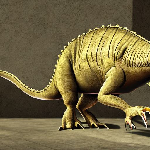

In [9]:
path = './train/dino/'
name = 'fd65880b-d3e4-412a-85a3-2270811369c2.jpg'
fullname = f'{path}/{name}'
load_img(fullname , target_size=(150, 150))

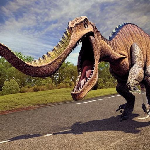

In [10]:
name = '008809ec-c4a2-478e-a4c0-ea297f27a4dd.jpg'
fullname = f'{path}/{name}'
load_img(fullname , target_size=(150, 150))

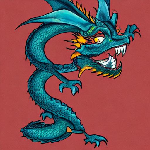

In [11]:
path = './train/dragon/'
name = '76ed968f-8c7f-4b77-8427-44f9743980f5.jpg'
fullname = f'{path}/{name}'
load_img(fullname , target_size=(150, 150))

## Create Model

You need to develop the model with following structure:

- The shape for input should be (150, 150, 3)
- Next, create a convolutional layer (Conv2D):
- Use 32 filters
- Kernel size should be (3, 3) (that's the size of the filter)
- Use 'relu' as activation
- Reduce the size of the feature map with max pooling (MaxPooling2D)
- Set the pooling size to (2, 2)
- Turn the multi-dimensional result into vectors using a Flatten layer
- Next, add a Dense layer with 64 neurons and 'relu' activation
- Finally, create the Dense layer with 1 neuron - this will be the output
- The output layer should have an activation - use the appropriate activation for the binary classification case
- As optimizer use SGD with the following parameters:
SGD(lr=0.002, momentum=0.8)



In [12]:
input_shape = (150, 150, 3)

In [13]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu',
                        input_shape=input_shape )
         )
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Q1 = binary crossentropy

In [14]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

In [15]:
model.name

'sequential'

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

## Q2 = 11214912

## Image Generator

In [17]:
# Training
idgTra = ImageDataGenerator(rescale=1./255)
idgTra.rescale

0.00392156862745098

In [18]:
genTra = idgTra.flow_from_directory(
    'train/',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
    )

Found 1594 images belonging to 2 classes.


In [19]:
genTra.batch_size

20

In [20]:
# Validation
idgVal = ImageDataGenerator(rescale=1./255)
idgVal.rescale

0.00392156862745098

In [21]:
genVal = idgVal.flow_from_directory(
    'test/',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
    )

Found 394 images belonging to 2 classes.


## First Training

In [22]:
history = model.fit(
    genTra,
    epochs=10,
    validation_data=genVal
)

Epoch 1/10
80/80 [==============================] - 19s 227ms/step - loss: 0.6172 - acc: 0.6455 - val_loss: 0.4928 - val_acc: 0.8274
Epoch 2/10
80/80 [==============================] - 17s 217ms/step - loss: 0.4642 - acc: 0.7867 - val_loss: 0.4082 - val_acc: 0.8299
Epoch 3/10
80/80 [==============================] - 18s 220ms/step - loss: 0.3791 - acc: 0.8463 - val_loss: 0.3612 - val_acc: 0.8553
Epoch 4/10
80/80 [==============================] - 18s 226ms/step - loss: 0.3421 - acc: 0.8676 - val_loss: 0.3258 - val_acc: 0.8655
Epoch 5/10
80/80 [==============================] - 23s 282ms/step - loss: 0.2885 - acc: 0.8902 - val_loss: 0.3091 - val_acc: 0.8782
Epoch 6/10
80/80 [==============================] - 23s 281ms/step - loss: 0.2546 - acc: 0.9103 - val_loss: 0.2901 - val_acc: 0.8807
Epoch 7/10
80/80 [==============================] - 20s 253ms/step - loss: 0.2219 - acc: 0.9203 - val_loss: 0.2919 - val_acc: 0.8706
Epoch 8/10
80/80 [==============================] - 18s 223ms/step - 

In [23]:
lstAccTra = history.history['acc']
lstAccTra

[0.6455457806587219,
 0.7867001295089722,
 0.8462986350059509,
 0.8676286339759827,
 0.8902133107185364,
 0.9102885723114014,
 0.9203262329101562,
 0.9247176647186279,
 0.942283570766449,
 0.9585947394371033]

In [24]:
npy.median(lstAccTra).round(3)

0.9

## Q3 = +/- 0.9

In [25]:
lstLosTra = history.history['loss']
lstLosTra

[0.6172164678573608,
 0.4641795754432678,
 0.37906181812286377,
 0.342060923576355,
 0.28846728801727295,
 0.2546079456806183,
 0.22188471257686615,
 0.21182970702648163,
 0.18222932517528534,
 0.14434950053691864]

In [26]:
npy.std(lstLosTra).round(2)

0.14

## Q4 = +/- 0.14

## Data Augmentation

Add the following augmentations to your training data generator:

- rotation_range=40,
- width_shift_range=0.2,
- height_shift_range=0.2,
- shear_range=0.2,
- zoom_range=0.2,
- horizontal_flip=True,
- fill_mode='nearest'

In [27]:
# Training with augemnted data
idgTra = ImageDataGenerator(
    rescale=1./255 ,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

In [28]:
genTra = idgTra.flow_from_directory(
    'train/',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
    )

Found 1594 images belonging to 2 classes.


<div class="alert alert-block alert-info">
<b>epoch ?</b> 
<p>Tried 2 versions of the "fit" to be sure we *continue* to learn:
<ul>
<li>... epochs=10 ...
<li>... epochs=20, initial_epoch=10 ...
</ul>
<p> Results of both methods return about the same results. Keeping method 2.
</div>

In [29]:
history = model.fit(
    genTra,
    epochs=20,
    validation_data=genVal ,
    initial_epoch=10
)

Epoch 11/20
80/80 [==============================] - 23s 287ms/step - loss: 0.4307 - acc: 0.7992 - val_loss: 0.4343 - val_acc: 0.8046
Epoch 12/20
80/80 [==============================] - 23s 288ms/step - loss: 0.4082 - acc: 0.8187 - val_loss: 0.2612 - val_acc: 0.8883
Epoch 13/20
80/80 [==============================] - 24s 299ms/step - loss: 0.3978 - acc: 0.8306 - val_loss: 0.2841 - val_acc: 0.8832
Epoch 14/20
80/80 [==============================] - 23s 291ms/step - loss: 0.4079 - acc: 0.8162 - val_loss: 0.3341 - val_acc: 0.8503
Epoch 15/20
80/80 [==============================] - 23s 290ms/step - loss: 0.3898 - acc: 0.8218 - val_loss: 0.6367 - val_acc: 0.7234
Epoch 16/20
80/80 [==============================] - 23s 286ms/step - loss: 0.3548 - acc: 0.8450 - val_loss: 0.2941 - val_acc: 0.8731
Epoch 17/20
80/80 [==============================] - 23s 288ms/step - loss: 0.3793 - acc: 0.8369 - val_loss: 0.4267 - val_acc: 0.8020
Epoch 18/20
80/80 [==============================] - 23s 283ms

In [30]:
lstLosVal = history.history['val_loss']
lstLosVal

[0.4343026280403137,
 0.2611997723579407,
 0.28410425782203674,
 0.33412468433380127,
 0.6366550922393799,
 0.29407939314842224,
 0.4267231523990631,
 0.43114009499549866,
 0.6410142183303833,
 0.4625210464000702]

In [31]:
npy.mean(lstLosVal).round(2)

0.42

## Q5 : +/- 0.42

In [32]:
lstAccVal = history.history['val_acc']
lstAccVal

[0.8045685291290283,
 0.8883248567581177,
 0.8832487463951111,
 0.8502538204193115,
 0.7233502268791199,
 0.8730964660644531,
 0.8020304441452026,
 0.8147208094596863,
 0.7385786771774292,
 0.7944162487983704]

In [33]:
lstAccVal[-5:]

[0.8730964660644531,
 0.8020304441452026,
 0.8147208094596863,
 0.7385786771774292,
 0.7944162487983704]

In [34]:
npy.average(lstAccVal[-5:]).round(2)

0.8

## Q6: +/- 0.8